<a href="https://colab.research.google.com/github/SrAyush31/machine_learning/blob/main/Clustering_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [7]:
!mkdir -p /root/.kaggle

In [8]:
!mv kaggle.json /root/.kaggle/

In [9]:
import kaggle

In [10]:
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 3.17MB/s]


In [12]:
!unzip -q /content/iris.zip

In [13]:
iris_df = sns.load_dataset('iris')

In [14]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


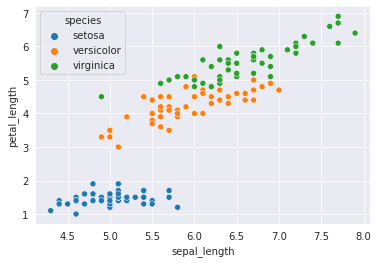

In [17]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length',hue='species')

In [18]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [19]:
X = iris_df[numeric_cols]

# Kmeans Clustering

In [20]:
from sklearn.cluster import KMeans

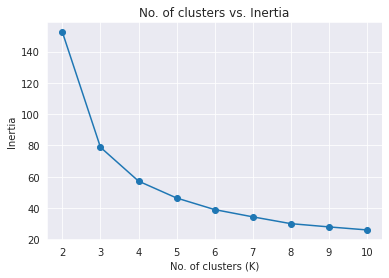

In [21]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

In [22]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

In [23]:
preds = model.predict(X)
preds

array([2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 5, 5, 5, 3, 5, 5, 5, 3, 5, 3, 3, 5, 3, 5, 3, 5,
       5, 3, 5, 3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 3, 5, 5, 5,
       3, 3, 3, 5, 3, 3, 3, 3, 3, 5, 3, 3, 1, 5, 4, 1, 1, 4, 3, 4, 1, 4,
       1, 1, 1, 5, 1, 1, 1, 4, 4, 5, 1, 5, 4, 5, 1, 4, 5, 5, 1, 4, 4, 4,
       1, 5, 5, 4, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 5], dtype=int32)

In [25]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


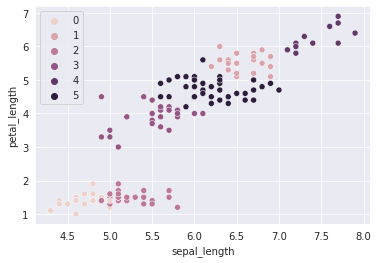

In [24]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);

# DBSCAN
Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
model = DBSCAN(eps=1.1, min_samples=4)

In [28]:
model = DBSCAN(eps=1.1, min_samples=4)

In [29]:
model.fit(X)

DBSCAN(algorithm='auto', eps=1.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [30]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

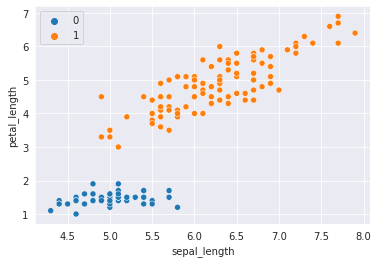

In [31]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_);

Here's how the results of DBSCAN and K Means differ:

<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png" width="640">

### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ

Here's an example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

Here's an example of PCA to reduce 3D data to 2D:

<img src="https://lihan.me/assets/images/pca-illustration.png" width="640">


Let's apply Principal Component Analysis to the Iris dataset.

In [33]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)

In [37]:
pca.fit(iris_df[numeric_cols])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
transformed = pca.transform(iris_df[numeric_cols])

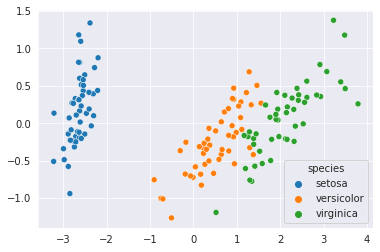

In [39]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species'])

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions. 

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">


Here's a visual representation of t-SNE applied to the MNIST dataset, which contains 28px x 28px images of handrwritten digits 0 to 9, a reduction from 784 dimensions to 2 dimensions ([source](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)):

<img src="https://indico.io/wp-content/uploads/2015/08/mnist-1024x607-1.jpg" width="640">

Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [40]:
from sklearn.manifold import TSNE

In [41]:
tsne = TSNE(n_components=2)

In [42]:
transformed = tsne.fit_transform(iris_df[numeric_cols])

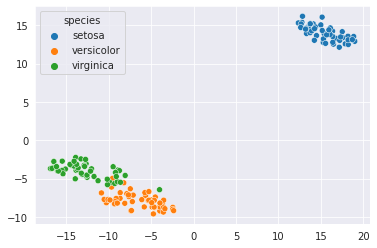

In [43]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);